# Explore here

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump

In [2]:

train_data = pd.read_csv('../data/processed/train.csv')
test_data = pd.read_csv('../data/processed/test.csv')


X_train = train_data.drop(columns=['Outcome'])
y_train = train_data['Outcome']
X_test = test_data.drop(columns=['Outcome'])
y_test = test_data['Outcome']

In [3]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

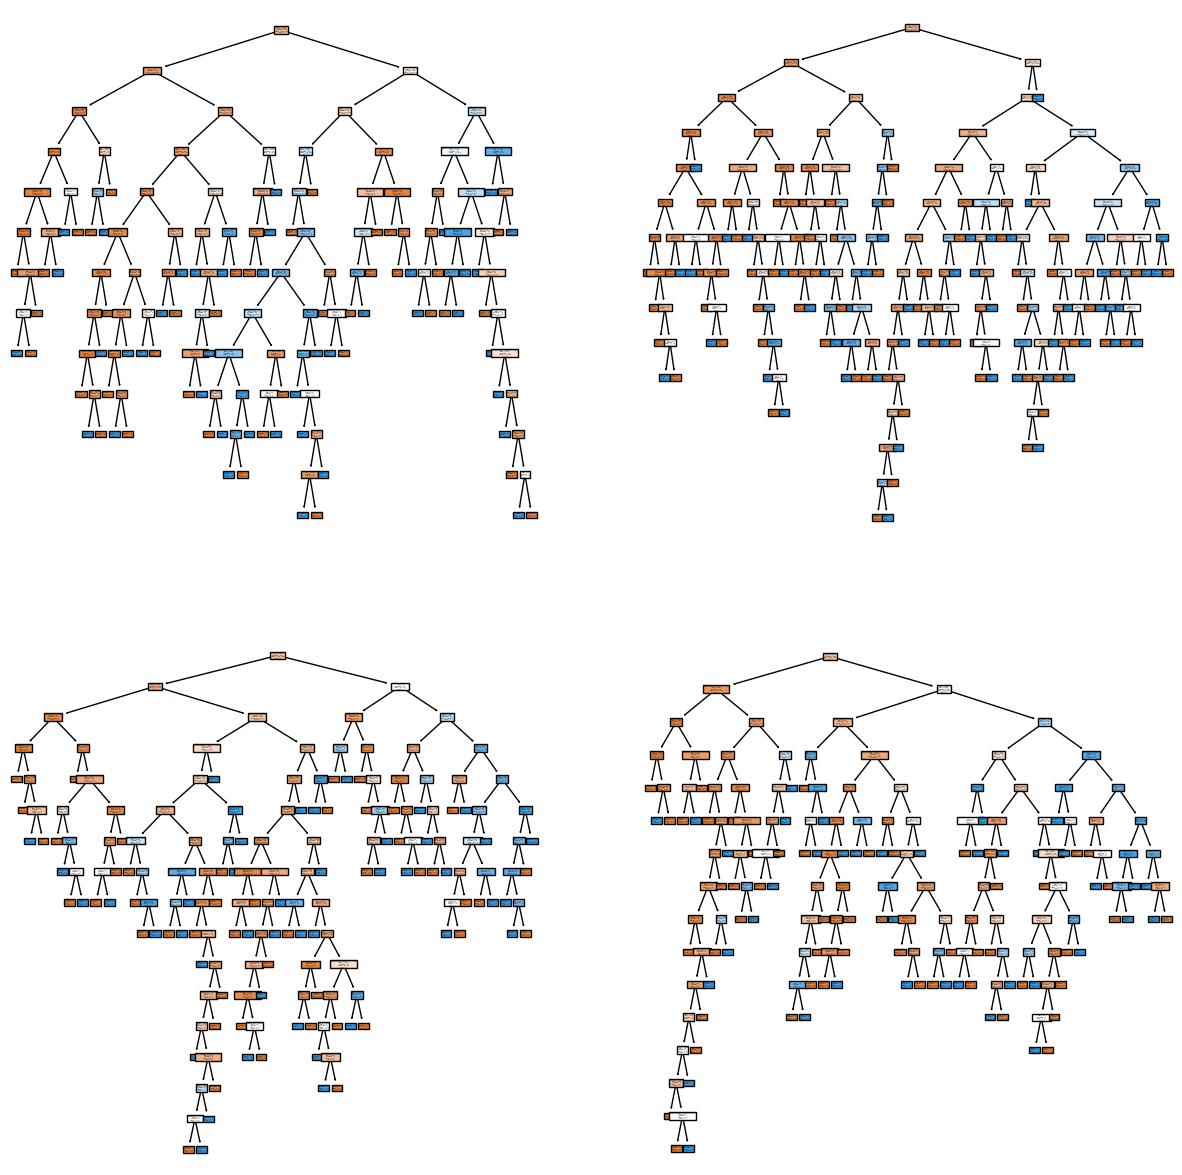

In [4]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [5]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
accuracy_score(y_test, y_pred)

0.828125

In [8]:
#Optimizando
hiperparameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'max_features': [2, 3, 4, 5, 6, 7, 8]
}

grid_search = GridSearchCV(estimator=model, param_grid=hiperparameters, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'n_estimators': 300}

In [9]:
model_grid = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=3, max_features=2, random_state=42)
model_grid.fit(X_train, y_train)


y_pred = model_grid.predict(X_test)

accuracy_score(y_test, y_pred)

0.7890625

In [ ]:
dump(model, open('../models/random_forest_classifier_default_42.pkl', 'wb'))
dump(model_grid, open('../models/diabetes_optimized_model.pkl', 'wb'))